In [30]:
# One-hot encoding
num_class = 5
x = [0, 2, 4, 1]
arr = np.eye(5)[x]
arr
'''
array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.]])
'''
# get_dummies
df = pd.DataFrame({'number': [1,2,3,2,1], 'char': ['a', 'b','a','c','a']})
dummies = pd.get_dummies(df['number'], prefix='number')
df2 = df.drop('number', axis=1).join(dummies)
df2

,char,number_1,number_2,number_3
0,a,1,0,0
1,b,0,1,0
2,a,0,0,1
3,c,0,1,0
4,a,1,0,0


In [1]:
import numpy as np
import pandas as pd
# Label Encoding
from sklearn.preprocessing import LabelEncoder
encX = LabelEncoder()
encX.fit(['cat','dog','fish'])
ency = LabelEncoder()
ency.fit(['T', 'F'])
df = pd.DataFrame({'pet': ['cat', 'dog', 'fish'], 'kind': ['T', 'F', 'F']})
# tansform
df['pet'] = encX.transform(df['pet'])
df['kind'] = ency.transform(df['kind'])
# inverse transform
df['kind_pred'] = ency.inverse_transform(np.array([1, 0, 0]))
df
# Label Encoding - Ordinal
dic = {'S': 1, 'L': 2, 'XL': 3}
df = pd.DataFrame({'size': ['S', 'XL', 'L']})
df['size_encoding'] = df['size'].map(dic)
df

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


,size,size_encoding
0,S,1
1,XL,3
2,L,2


In [4]:
# NAN
# ref: https://stackoverflow.com/questions/29530232/python-pandas-check-if-any-value-is-nan-in-dataframe
df = pd.DataFrame(np.random.randn(1000,1000))
df[df>0.9] = pd.np.nan
df.isnull().any() # columns contain nan
df.isnull().any().any() # df contains NAN
df.isnull().sum() # columns nan count
df.isnull().sum() # df nan count
nan_rows = df[df['column_name'].isnull()]

0      195
1      176
2      201
3      177
4      185
5      194
6      194
7      180
8      174
9      183
10     162
11     180
12     184
13     167
14     178
15     177
16     199
17     192
18     168
19     176
20     203
21     193
22     180
23     174
24     168
25     205
26     191
27     179
28     197
29     184
      ... 
970    192
971    169
972    161
973    183
974    181
975    182
976    172
977    180
978    209
979    183
980    186
981    183
982    176
983    206
984    175
985    176
986    181
987    193
988    210
989    193
990    180
991    171
992    172
993    183
994    200
995    171
996    189
997    188
998    173
999    193
Length: 1000, dtype: int64

In [3]:
# reverse cv2 channels
import cv2
path = 'ImagePath.jpg'
img = cv2.imread(path)
img = img[:, :, ::-1] # reverse channel values

TypeError: 'NoneType' object is not subscriptable

In [34]:
# split dataset to training and testing
from sklearn.model_selection import train_test_split
X = [1,2,3]
y = [0,1,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train, X_test, y_train, y_test

([1, 2], [3], [0, 1], [0])

In [44]:
# Normalization
from sklearn import preprocessing
a = np.array([[1, 20, 100],
              [-1, 50, -200],
              [2, 20, 400]], dtype=np.float64)
df = pd.DataFrame(a)
preprocessing.scale(df[0]) # Z-score: (x - mean) / std
preprocessing.minmax_scale(df[0]) # (x - min(x)) / (max(x) - min(x))

array([0.66666667, 0.        , 1.        ])

In [79]:
# SVM
from sklearn.svm import SVC
model = SVC()
model.fix(X_train, y_train)
prediction = model.predict(X_test)


AttributeError: 'SVC' object has no attribute 'fix'

In [80]:
# XGBoost
from xgb import XGBClassifier, XGBRegressor
eval_set=[(X_test, y_test)]
model = XGBClassifier()
model.fit(X_train, 
          y_train, 
          early_stopping_rounds=10, 
          eval_metric="auc", 
          eval_set=eval_set, 
          verbose=True)

ModuleNotFoundError: No module named 'xgb'

In [68]:
# metrics
from sklearn import metrics
# mae, mse, r2
prediction = [0.5, 0.6, 0.7]
y = [0.55, 0.2, 0.56]
mae = metrics.mean_absolute_error(prediction, y)
mse = metrics.mean_squared_error(prediction, y)
r2 = metrics.r2_score(prediction, y)
mae, mse, r2

(0.19666666666666663, 0.06069999999999998, -8.105000000000002)

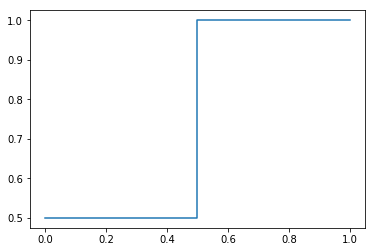

(array([0. , 0.5, 0.5, 1. ]), array([0.5, 0.5, 1. , 1. ]))

In [77]:
# AUC, ROC curve
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2) # 2:T 1:F
metrics.auc(fpr, tpr)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(fpr, tpr)
plt.show()
fpr, tpr